### Importing librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sklearn.preprocessing
import sklearn.cluster

### Database connexion

In [3]:
pw = "password1999"
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string, pool_pre_ping = False)

### Training parameters

In [4]:
df_feat = pd.read_sql("SELECT * FROM spotify.df_features_all_genres", engine) #Reading database

In [5]:
df_feat.drop_duplicates(inplace= True)
df_feat.shape

(87574, 18)

In [15]:
X = df_feat.iloc[:,0:11]
X.drop_duplicates(inplace=True, keep="first")

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) #numpy array as result
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns) #converting to df to see

K = range(8000,10000,500)
inertia = []

### Model training

In [16]:
for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = sklearn.cluster.KMeans(n_clusters=k,random_state=128)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)
    print("intertia = ", inertia)

Training a K-Means model with 8000 clusters! 



/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


intertia =  [48204.99461279578]
Training a K-Means model with 8500 clusters! 



/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


intertia =  [48204.99461279578, 46725.40012696323]
Training a K-Means model with 9000 clusters! 



/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


intertia =  [48204.99461279578, 46725.40012696323, 45325.90783501073]
Training a K-Means model with 9500 clusters! 



/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


intertia =  [48204.99461279578, 46725.40012696323, 45325.90783501073, 44053.24191713231]


In [17]:
inertia

[48204.99461279578, 46725.40012696323, 45325.90783501073, 44053.24191713231]

#### Plotting

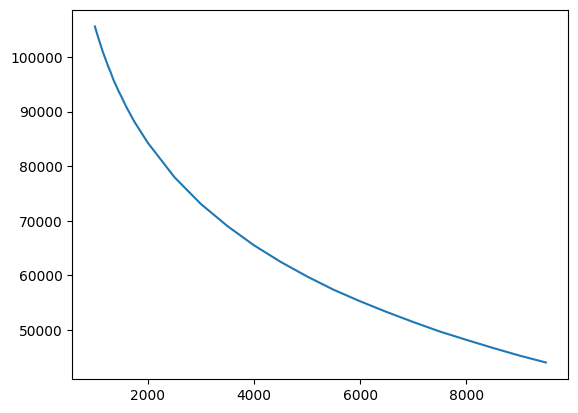

In [20]:
x1 = [i for i in range (1000,2001,50)]
y1 = [105574.55466910769, 103950.39116314708, 102410.11871781341, 100923.61870065177, 99597.816365346, 98276.1288982061, 97114.78583660656, 95792.31528650242, 94736.74301931445, 93669.96601800667, 92716.42433748054, 91690.34196338589, 90714.53021726443, 89824.71812727796, 88926.4333028888, 88048.84414884163, 87285.97253229874, 86526.64308126969, 85762.73028540403, 84996.91929100978, 84248.81068549574]
x2 = [i for i in range(2500,8000,500)]
y2 = [77974.86253798619, 73054.93053993932, 69017.49102026774, 65503.99071894758, 62481.23982316518, 59801.61609052043, 57370.713817594355, 55255.92489737648, 53299.73211427243, 51468.1883782836, 49727.84877880573]
x3 = [i for i in range(8000,10000,500)]
y3 = [48204.99461279578, 46725.40012696323, 45325.90783501073, 44053.24191713231]
plt.plot(x1+x2+x3,y1+y2+y3)